In [4]:
!pip install pandas matplotlib seaborn scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, silhouette_score

# Load Data
data = {
    'User ID': [1, 2, 3, 4, 5],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Age': [30, 25, 40, 35, 28],
    'Activity Level': ['Active', 'Moderate', 'Sedentary', 'Active', 'Moderate'],
    'Location': ['Urban', 'Rural', 'Suburban', 'Urban', 'Rural'],
    'App Sessions': [100, 50, 200, 150, 75],
    'Distance Travelled (km)': [50, 20, 100, 75, 30],
    'Calories Burned': [500, 200, 1000, 750, 300]
}
df = pd.DataFrame(data)

# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Activity Level'] = le.fit_transform(df['Activity Level'])
df['Location'] = le.fit_transform(df['Location'])

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']])


        User ID    Gender       Age  Activity Level  Location  App Sessions  \
count  5.000000  5.000000   5.00000         5.00000       5.0      5.000000   
mean   3.000000  0.600000  31.60000         0.80000       1.0    115.000000   
std    1.581139  0.547723   5.94138         0.83666       1.0     60.207973   
min    1.000000  0.000000  25.00000         0.00000       0.0     50.000000   
25%    2.000000  0.000000  28.00000         0.00000       0.0     75.000000   
50%    3.000000  1.000000  30.00000         1.00000       1.0    100.000000   
75%    4.000000  1.000000  35.00000         1.00000       2.0    150.000000   
max    5.000000  1.000000  40.00000         2.00000       2.0    200.000000   

       Distance Travelled (km)  Calories Burned  
count                 5.000000         5.000000  
mean                 55.000000       550.000000  
std                  32.787193       327.871926  
min                  20.000000       200.000000  
25%                  30.000000       3

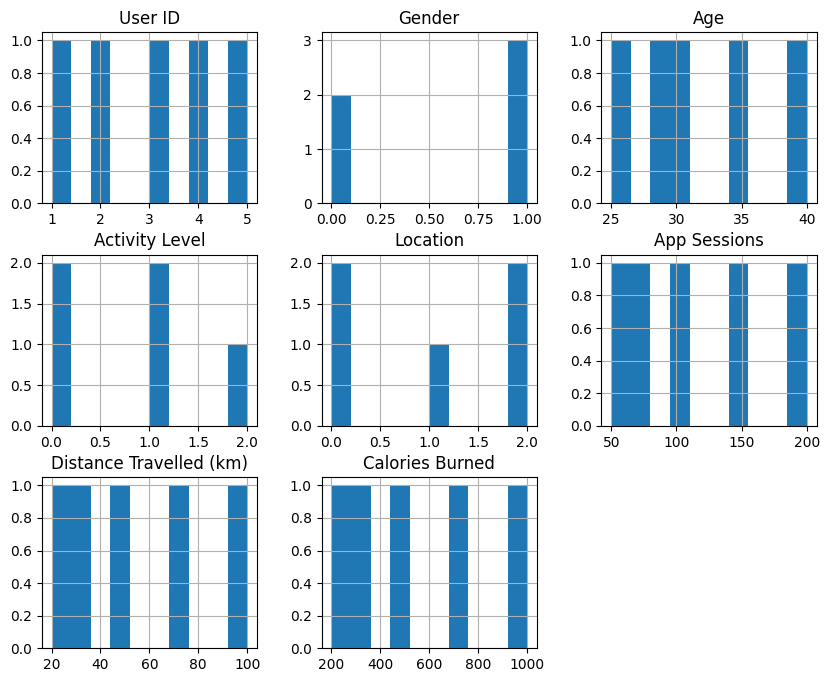

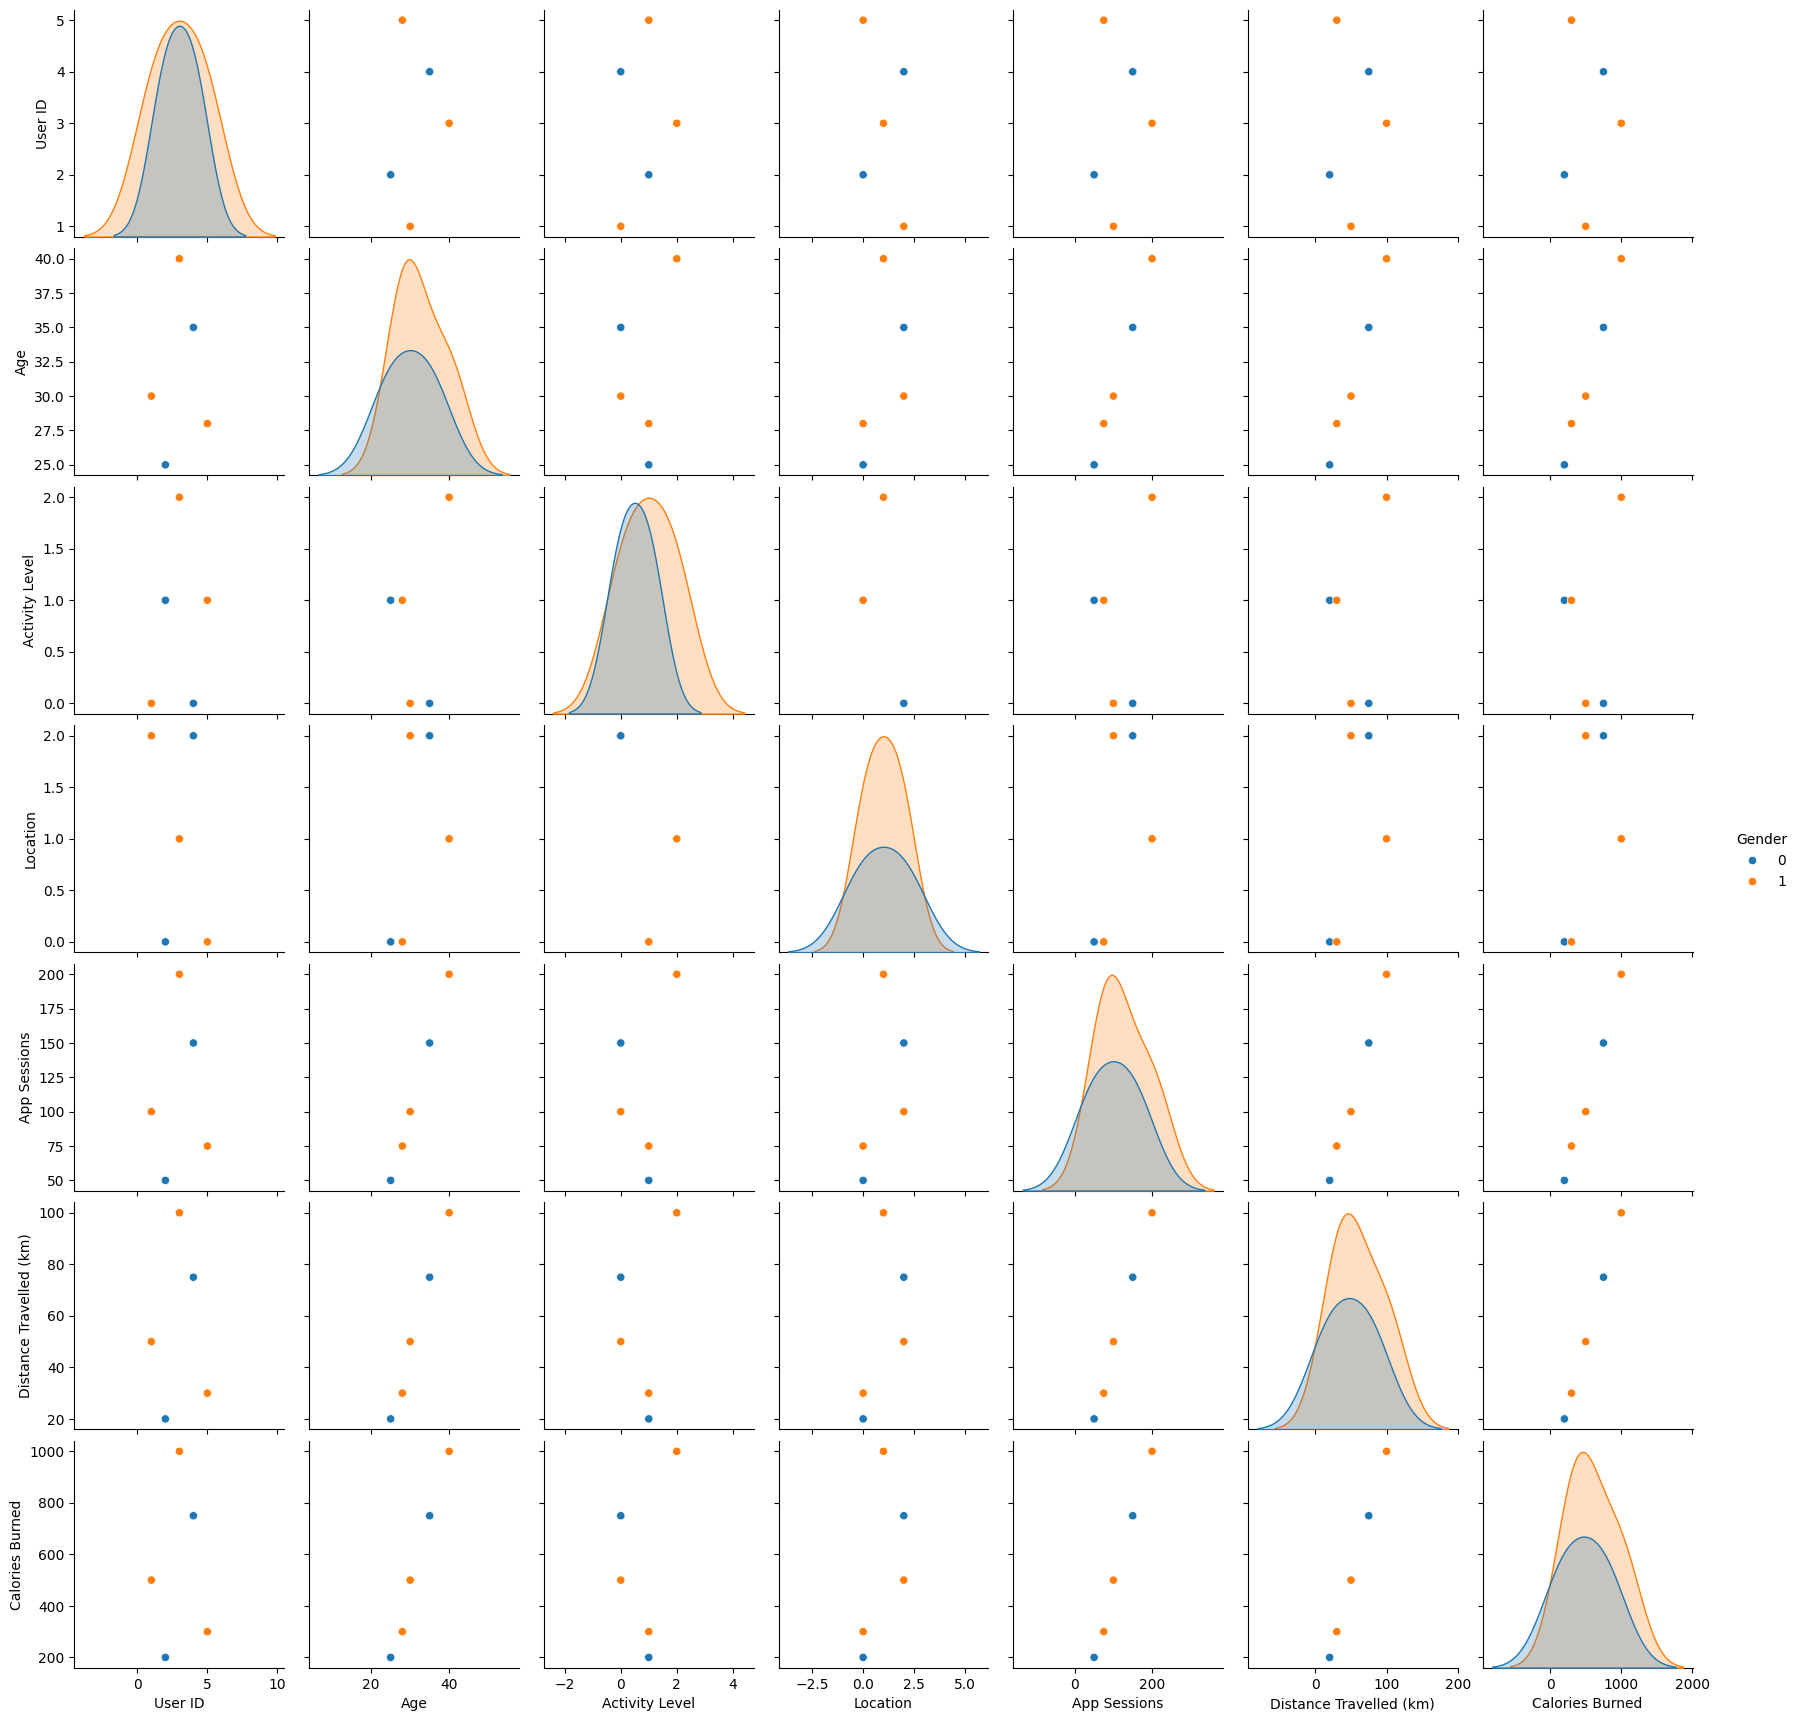

In [2]:
# Descriptive Statistics
print(df.describe())

# Histograms
df.hist(bins=10, figsize=(10, 8))
plt.show()

# Scatter Plot Matrix
sns.pairplot(df, hue='Gender')
plt.show()


Mean Squared Error: 461.2068965517243
Root Mean Squared Error: 21.47572807966529
R^2 Score: 0.9946371291098637


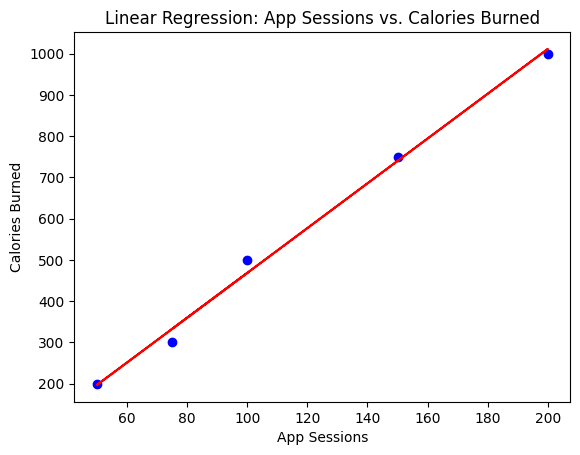

In [3]:
# Linear Regression
X = df['App Sessions'].values.reshape(-1, 1)
y = df['Calories Burned'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = model.score(X, y)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

# Plot results
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('App Sessions')
plt.ylabel('Calories Burned')
plt.title('Linear Regression: App Sessions vs. Calories Burned')
plt.show()


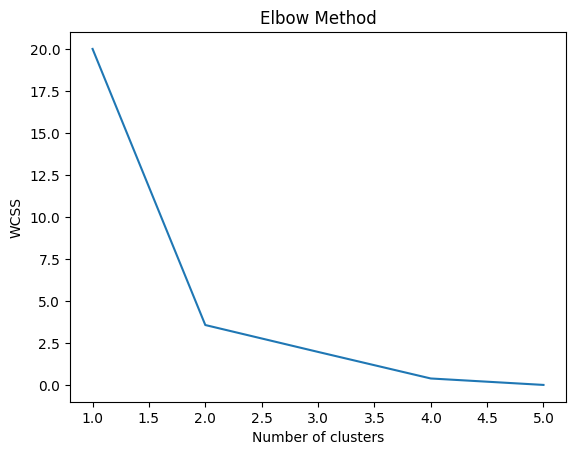

Silhouette Score: 0.2819052588801717


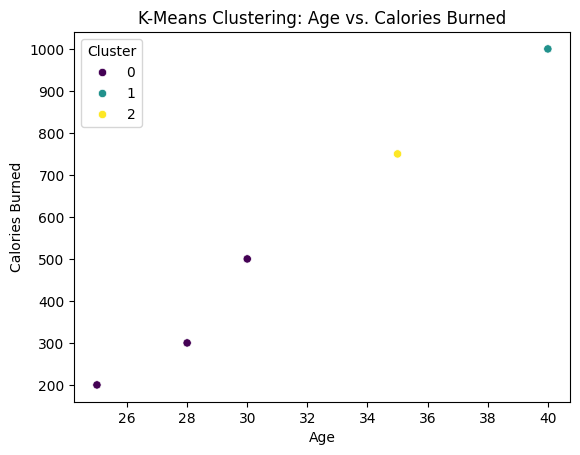

In [4]:
# K-Means Clustering
features = scaled_features
wcss = []
max_clusters = 5  # Number of clusters cannot exceed the number of samples
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Elbow Method to determine the optimal number of clusters
plt.plot(range(1, max_clusters + 1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit K-Means with the optimal number of clusters
optimal_clusters = 3  # Assuming 3 is optimal based on the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(features)
df['Cluster'] = clusters

# Evaluate the clustering
sil_score = silhouette_score(features, clusters)
print(f'Silhouette Score: {sil_score}')

# Plot clusters
sns.scatterplot(data=df, x='Age', y='Calories Burned', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering: Age vs. Calories Burned')
plt.show()


In [5]:
# New data point for prediction
new_sessions = np.array([[120]])

# Predict calories burned
predicted_calories = model.predict(new_sessions)
print(f'Predicted Calories Burned for 120 App Sessions: {predicted_calories[0]}')


Predicted Calories Burned for 120 App Sessions: 577.1551724137931


In [6]:
# New data point for prediction
new_user = np.array([[30, 120, 60, 600]])  # Age: 30, App Sessions: 120, Distance Travelled: 60, Calories Burned: 600

# Standardize the new user data
new_user_scaled = scaler.transform(new_user)

# Predict the cluster
predicted_cluster = kmeans.predict(new_user_scaled)
print(f'Predicted Cluster for the new user: {predicted_cluster[0]}')


Predicted Cluster for the new user: 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


performance

In [7]:
# Regression Model Evaluation
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = model.score(X, y)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 461.2068965517243
Root Mean Squared Error: 21.47572807966529
R^2 Score: 0.9946371291098637


In [8]:
# Clustering Model Evaluation
sil_score = silhouette_score(features, clusters)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.2819052588801717
